In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import pandas as pd
from scipy.stats import norm
from numpy.random import randint

[1 2 3 4 5 6] [173 166 161 156 166 178]
[1 2 3 4 5 6] [173. 166. 161. 156. 166. 178.]


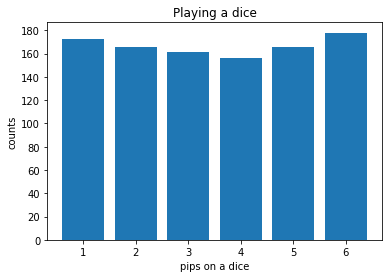

In [2]:
trial_num = 1000
R = randint(1,7,trial_num)
sa = np.setdiff1d(np.array(range(1,7)), R)

labels, counts = np.unique(R, return_counts=True)
print(labels, counts)
labels = np.append(labels,sa)
counts = np.append(counts,np.zeros(len(sa)))
plt.gca().get_yaxis().set_major_locator(MaxNLocator(integer=True))
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.title("Playing a dice")
plt.xlabel("pips on a dice")
plt.ylabel("counts")
print(labels, counts)

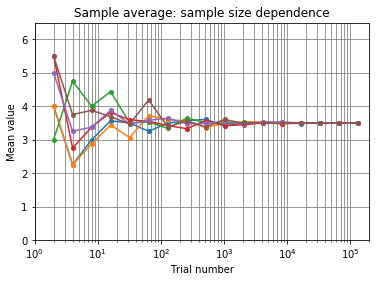

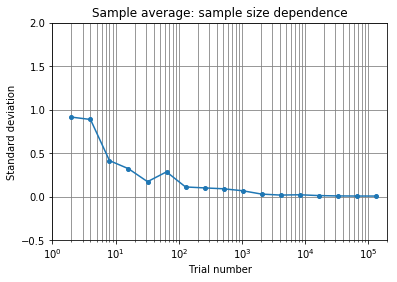

In [3]:
ave_table = []
num_repeat = 6

def dice_AveVar_calc(playnum):
    play = np.random.randint(1, 7, playnum)
    return np.average(play), np.var(play, ddof=0)

di = [2**x for x in range(1, 18)]

for num_trials in range(num_repeat):
    dice_ave_for_trialnum = []

    for p in di:
        ave, var = dice_AveVar_calc(p)
        dice_ave_for_trialnum.append(ave)

    ave_table.append(dice_ave_for_trialnum)
    plt.plot(di, dice_ave_for_trialnum, marker="o", markersize=4)

hoge = np.array(ave_table).reshape(num_repeat, len(di))
stds = np.sqrt(np.var(hoge, axis=0))

plt.xscale('log')
plt.grid(which='major',color='gray',linestyle='-')
plt.grid(which='minor',color='gray',linestyle='-')
plt.axis([1,2e5,0,6.5])	 #[X軸最小値, X軸最大値, Y軸最小値, Y軸最大値]
plt.title("Sample average: sample size dependence")
plt.xlabel("Trial number")
plt.ylabel("Mean value")
plt.show()
plt.plot(di, stds, marker="o", markersize=4)
plt.xscale('log')
plt.grid(which='major',color='gray',linestyle='-')
plt.grid(which='minor',color='gray',linestyle='-')
plt.axis([1,2e5,-.5,2])	 #[X軸最小値, X軸最大値, Y軸最小値, Y軸最大値]
plt.title("Sample average: sample size dependence")
plt.xlabel("Trial number")
plt.ylabel("Standard deviation")
plt.show()

In [4]:
pd.DataFrame(hoge)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,4.0,2.25,3.000,3.5625,3.50000,3.250000,3.492188,3.570312,3.603516,3.414062,3.502441,3.524902,3.508179,3.477478,3.509308,3.492065,3.500679
1,4.0,2.25,2.875,3.4375,3.06250,3.718750,3.593750,3.562500,3.359375,3.499023,3.530273,3.531250,3.467163,3.502319,3.499878,3.495422,3.488129
2,3.0,4.75,4.000,4.4375,3.50000,3.531250,3.335938,3.640625,3.513672,3.484375,3.516113,3.491211,3.524780,3.491882,3.497589,3.501419,3.504044
3,5.5,2.75,3.375,3.8125,3.59375,3.546875,3.421875,3.328125,3.566406,3.417969,3.445312,3.498047,3.482056,3.496399,3.493774,3.509598,3.503647
4,5.0,3.25,3.375,3.8750,3.46875,3.578125,3.640625,3.476562,3.484375,3.540039,3.476074,3.526367,3.515991,3.505554,3.499634,3.497360,3.499023
5,5.5,3.75,3.875,3.6875,3.46875,4.187500,3.382812,3.554688,3.384766,3.603516,3.482910,3.497070,3.487671,3.510803,3.486938,3.497803,3.499031
